# **Estimación de Métricas de Estructura y Complejidad de Programas Lógicos Rebatibles**

### Proyecto Final para le Especialización en Ciencias de Datos - 2022
Alumno: Mario Alejandro Leiva

Docente Tutor: Dr. Gerardo I. Simari

In [1]:
nombre_y_apellido = 'Mario Alejandro Leiva'
print(nombre_y_apellido)

Mario Alejandro Leiva


In [2]:
# Carga del modulo para acceder a archivos de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Algunos paquetes iniciales a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Carga del conjunto de datos
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Final/dataset.csv')

Una previsualización del conjunto de datos, los tipos de datos y el número de filas.

In [5]:
data

,program,BE,FACTS,DRUL,HEADS,BODY,ARGLVL,LVL,DEFT,HEIGHT,NAR,ALE,NDT,AWI,AHE,NRU,NBE,TIME
0,0,0,0.5,0.5,3,3,3,2,1,1,25,2.12,18,2.56,1.87,17,10,0.21
1,1,0,0.5,0.5,3,3,3,2,1,1,32,2.97,18,1.72,3.13,16,9,0.21
2,2,0,0.5,0.5,3,3,3,2,1,1,45,3.27,26,8.65,4.42,19,9,3.26
3,3,0,0.5,0.5,3,3,3,2,1,1,29,2.21,24,3.67,2.40,19,9,0.61
4,4,0,0.5,0.5,3,3,3,2,1,1,27,1.74,10,2.30,1.96,19,9,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,495,100,0.5,0.5,1,5,3,2,2,5,46,5.37,44,389.64,20.27,50,146,540.09
31996,496,100,0.5,0.5,1,5,3,2,2,5,35,5.86,24,23.46,7.04,44,139,16.74
31997,497,100,0.5,0.5,1,5,3,2,2,5,34,5.62,30,8.60,6.50,37,132,3.67
31998,498,100,0.5,0.5,1,5,3,2,2,5,43,6.02,40,24.57,8.18,44,143,12.43


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   program  32000 non-null  int64  
 1   BE       32000 non-null  int64  
 2   FACTS    32000 non-null  float64
 3   DRUL     32000 non-null  float64
 4   HEADS    32000 non-null  int64  
 5   BODY     32000 non-null  int64  
 6   ARGLVL   32000 non-null  int64  
 7   LVL      32000 non-null  int64  
 8   DEFT     32000 non-null  int64  
 9   HEIGHT   32000 non-null  int64  
 10  NAR      32000 non-null  int64  
 11  ALE      32000 non-null  float64
 12  NDT      32000 non-null  int64  
 13  AWI      32000 non-null  float64
 14  AHE      32000 non-null  float64
 15  NRU      32000 non-null  int64  
 16  NBE      32000 non-null  int64  
 17  TIME     32000 non-null  float64
dtypes: float64(6), int64(12)
memory usage: 4.4 MB


In [7]:
# Elimino los atributos que no me interesan, en este caso, el valor de las métricas y el número de programa: program, NAR, ALE, NDT, AWI, AHE, NRU, NBE.
data = data.drop(['program','NAR', 'ALE', 'NDT', 'AWI', 'AHE', 'NRU', 'NBE'], axis=1)

Como estoy interesado en el atributo `TIME` en particular, es necesario conocer los valores estadísticos de ese atributo:

In [8]:
data['TIME'].describe()

count    32000.000000
mean        49.140677
std        194.245003
min          0.030000
25%          0.080000
50%          0.160000
75%          0.840000
max        900.160000
Name: TIME, dtype: float64

Para la tarea 1, tengo que encontrar un valor de umbral `T` que permita separar aquellos programas que sean "difíciles" de computar de los "fáciles" de computar. Es decir, necesito definir un valor `T` de tiempo para clasificar los programas que tengan `Tiempo > T` de los que tengan `Tiempo < T`. Para esto, voy a analizar y graficar la distribución de los valores del atributo `TIME`:

<Axes: title={'center': 'Time'}, xlabel='Segundos', ylabel='Número de programas'>

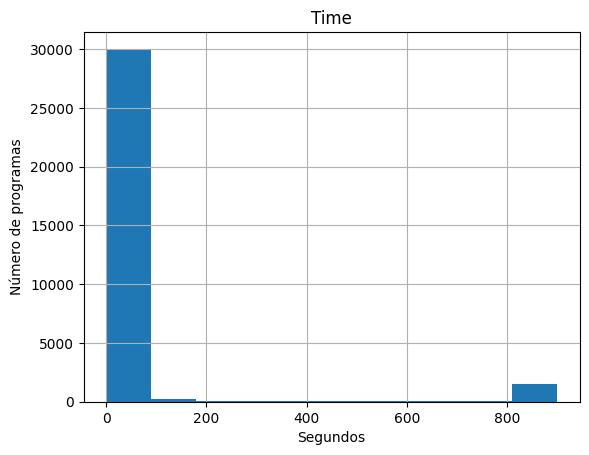

In [9]:
plt.title('Time')
plt.ylabel('Número de programas')
plt.xlabel('Segundos')
data['TIME'].hist()

<Axes: title={'center': 'Time'}, xlabel='Segundos', ylabel='Número de programas'>

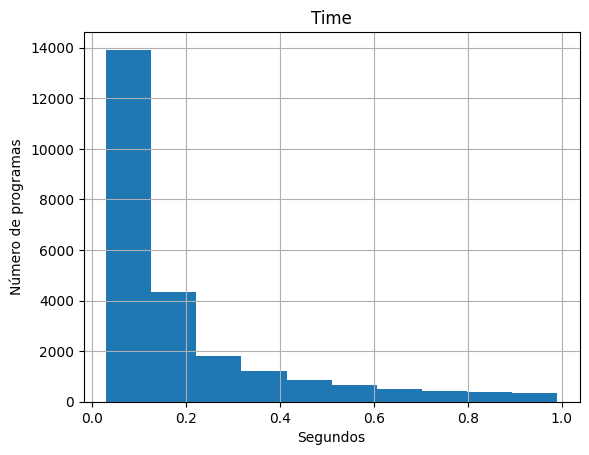

In [12]:
plt.title('Time')
plt.ylabel('Número de programas')
plt.xlabel('Segundos')
data[data['TIME']<1]['TIME'].hist()

In [13]:
n_easy_programs = len(data[data['TIME'] <= 1])
print("El %d%% del dataset son programas simples" % ((n_easy_programs*100)/32000))

El 76% del dataset son programas simples


Definiendo un umbral de `1 segundo`, tenemos que el 76% de los programas en el dataset son programas fáciles. Esto nos permite trabajar con un dataset levemente desbalanceado. A continuación se agrega el atributo `label`, que será igual a 0 si el programa es fácil (`TIME < 1`), o 1 si el programa es difícil (`TIME > 1`).

In [14]:
data['label'] = [1 if time >= 1 else 0 for time in data['TIME']]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BE      32000 non-null  int64  
 1   FACTS   32000 non-null  float64
 2   DRUL    32000 non-null  float64
 3   HEADS   32000 non-null  int64  
 4   BODY    32000 non-null  int64  
 5   ARGLVL  32000 non-null  int64  
 6   LVL     32000 non-null  int64  
 7   DEFT    32000 non-null  int64  
 8   HEIGHT  32000 non-null  int64  
 9   TIME    32000 non-null  float64
 10  label   32000 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 2.7 MB


Text(0.5, 1.0, 'Distribución del dataset por umbral')

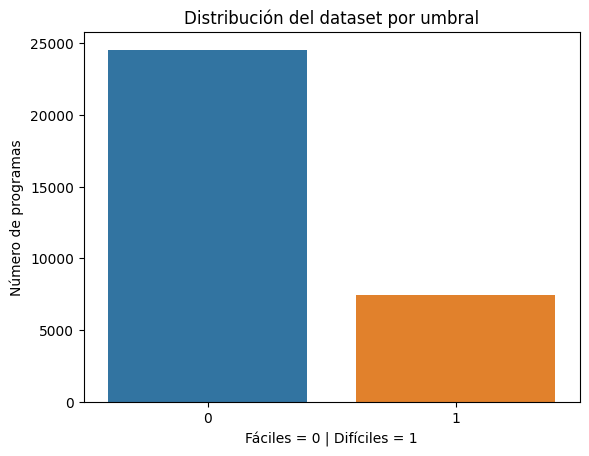

In [16]:
# Para mostrar la distribución del dataset según el valor de 'label'
sns.countplot(x='label', data=data)
plt.xlabel('Fáciles = 0 | Difíciles = 1')
plt.ylabel('Número de programas')
plt.title("Distribución del dataset por umbral")

In [17]:
# Elimino el atributo tiempo
data = data.drop(['TIME'], axis = 1)



---


Aquí comienza las tareas relacionadas al objetivo 1: A partir del valor de  todos los parámetros, clasificar el programa como "`fácil`" o "`difícil`"


---



# Tarea 1

Para comenzar con las tareas de clasificación, primero se mezclaron los datos y luego se separaron los conjunto de entrenamiento y testeo:

In [18]:
# Mezclamos el conjunto de datos
from sklearn.utils import shuffle
data_shuffled = shuffle(data)
data_shuffled

,BE,FACTS,DRUL,HEADS,BODY,ARGLVL,LVL,DEFT,HEIGHT,label
2182,80,0.5,0.5,3,3,3,2,1,1,1
14458,100,0.5,0.9,3,3,3,2,1,1,0
13995,100,0.5,0.8,3,3,3,2,1,1,0
152,0,0.5,0.5,3,3,3,2,1,1,0
25131,100,0.5,0.5,1,2,2,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...
5865,100,0.1,0.5,3,3,3,2,3,1,1
29873,100,0.5,0.5,1,5,3,2,2,1,0
11669,100,0.5,0.4,3,3,3,2,1,1,0
17836,100,0.5,0.5,1,2,3,3,1,1,0


In [19]:
## Para los clasificadores
X = data_shuffled.drop(['label'], axis=1)
Y = data_shuffled['label']
## Para los Autoencoders
easy_p = data_shuffled[data_shuffled['label'] == 0]
hard_p = data_shuffled[data_shuffled['label'] == 1]

In [20]:
# Particiono el dataset en un conjunto de entrenamiento y un conjunto de testeo:
from sklearn.model_selection import train_test_split
train_set = data_shuffled.sample(frac=0.8, random_state=0) # Conjunto de entrenamiento
test_set = data_shuffled.drop(train_set.index) # Conjunto de testeo

# Los separo por atributos y etiquetas
x_train = train_set.drop(['label'], axis=1)
y_train = train_set['label']
x_test = test_set.drop(['label'], axis=1)
y_test = test_set['label']

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [22]:
# Creamos y entrenamos el modelo
model_decision_tree = DecisionTreeClassifier()

#Valores de hiperparámetros para optimizar el accuracy
hiperparams_values = {'criterion':['gini','entropy']}

#Buscar los valores de hiperparámetros que optimizan el accuracy con una validación cruzada de 5 pliegues
grid_search = GridSearchCV(model_decision_tree, hiperparams_values, cv=5, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="accuracy")
grid_search.fit(X, Y)

print("El mejor valor para k = {} con accuracy {}.".format(grid_search.best_params_,grid_search.best_score_))

cv_results = pd.DataFrame(grid_search.cv_results_)
best_model_results = cv_results.loc[grid_search.best_index_]
print("Acc: ", best_model_results['mean_test_accuracy'])
print("Precision: ", best_model_results['mean_test_f1'])
print("Recall: ", best_model_results['mean_test_recall'])
print("F1: ", best_model_results['mean_test_f1'])
#cross_fold_val = cross_val_score(model_decision_tree, x_train, y_train, cv=5, scoring='accuracy')
#print("Valor de accuracy para cada pliege: ", cross_fold_val)
#print("Accuracy promedio: %0.2f" % (cross_fold_val.mean()*100))

El mejor valor para k = {'criterion': 'gini'} con accuracy 0.84053125.
Acc:  0.84053125
Precision:  0.6369339822920572
Recall:  0.6000818834633114
F1:  0.6369339822920572


In [23]:
## Escriba aquí su código
from sklearn.ensemble import RandomForestClassifier

# Creamos el nuevo modelo
model_random_forest = RandomForestClassifier()

hiperparams_values = {'n_estimators':[5, 10, 50, 100], 'criterion':['gini', 'entropy']}

grid_search = GridSearchCV(model_random_forest, hiperparams_values, cv=5, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="accuracy")
grid_search.fit(X, Y)

print("El mejor valor para k = {} con accuracy {}.".format(grid_search.best_params_,grid_search.best_score_))

cv_results = pd.DataFrame(grid_search.cv_results_)
best_model_results = cv_results.loc[grid_search.best_index_]
print("Acc: ", best_model_results['mean_test_accuracy'])
print("Precision: ", best_model_results['mean_test_f1'])
print("Recall: ", best_model_results['mean_test_recall'])
print("F1: ", best_model_results['mean_test_f1'])

El mejor valor para k = {'criterion': 'gini', 'n_estimators': 50} con accuracy 0.84053125.
Acc:  0.84053125
Precision:  0.6369339822920572
Recall:  0.6000818834633114
F1:  0.6369339822920572


In [24]:
from sklearn.linear_model import LogisticRegression

# Creamos el nuevo modelo
model_logistic_regression = LogisticRegression()

hiperparams_values = {"C":[1,5,10], "penalty":["l1","l2"]}

grid_search = GridSearchCV(model_logistic_regression, hiperparams_values, cv=5, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="accuracy")
grid_search.fit(X, Y)

print("El mejor valor para k = {} con accuracy {}.".format(grid_search.best_params_,grid_search.best_score_))
cv_results = pd.DataFrame(grid_search.cv_results_)
best_model_results = cv_results.loc[grid_search.best_index_]
print("Acc: ", best_model_results['mean_test_accuracy'])
print("Precision: ", best_model_results['mean_test_f1'])
print("Recall: ", best_model_results['mean_test_recall'])
print("F1: ", best_model_results['mean_test_f1'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

El mejor valor para k = {'C': 10, 'penalty': 'l2'} con accuracy 0.83853125.
Acc:  0.83853125
Precision:  0.6370841788736652
Recall:  0.6098683938810069
F1:  0.6370841788736652


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el nuevo modelo
model_knn = KNeighborsClassifier()

hiperparams_values = {"n_neighbors":[1,5,10,15,20,25,30], "weights":["uniform", "distance"]}

grid_search = GridSearchCV(model_knn, hiperparams_values, cv=5, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="accuracy")
grid_search.fit(X, Y)

print("El mejor valor para k = {} con accuracy {}.".format(grid_search.best_params_,grid_search.best_score_))
cv_results = pd.DataFrame(grid_search.cv_results_)
best_model_results = cv_results.loc[grid_search.best_index_]
print("Acc: ", best_model_results['mean_test_accuracy'])
print("Precision: ", best_model_results['mean_test_f1'])
print("Recall: ", best_model_results['mean_test_recall'])
print("F1: ", best_model_results['mean_test_f1'])

El mejor valor para k = {'n_neighbors': 25, 'weights': 'uniform'} con accuracy 0.8374375000000001.
Acc:  0.8374375000000001
Precision:  0.5814980919907773
Recall:  0.48499467577919475
F1:  0.5814980919907773


In [26]:
print(x_train.shape)
print(y_train.shape)

(25600, 9)
(25600,)


In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.utils import plot_model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


###### Modelo ######
# Una capa de 9 nodos, activación 'relu'.
# Una capa de 9 nodos, activación 'relu'. Learning Rate de 0.001
# Una capa de 1 nodo, activación 'sigmoid'.
######################

# Definir una red de capas que mapee las entradas a los objetivos
model1 = models.Sequential()
model1.add(layers.Dense(9, activation='relu', input_shape=(9,)))
model1.add(layers.Dense(9, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.Dense(1, activation='sigmoid'))

# Configurar el proceso de aprendizaje eligiendo una función de pérdida, un optimizador y algunas métricas para monitorear (en este caso el accuracy).
model1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc',f1_m,precision_m, recall_m])

# Iterar sobre los datos de entrenamiento llamando al método fit() del modelo.
history1 = model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data = (x_test,y_test))
# evaluate the model
loss, accuracy, f1_score, precision, recall = model1.evaluate(x_test,y_test, verbose=0)

Epoch 1/20
200/200 [==============================] - 2s 4ms/step - loss: 1.2959 - acc: 0.5834 - f1_m: 0.1331 - precision_m: 0.0842 - recall_m: 0.3402 - val_loss: 0.5448 - val_acc: 0.7675 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
200/200 [==============================] - 0s 2ms/step - loss: 0.5309 - acc: 0.7686 - f1_m: 0.0172 - precision_m: 0.0594 - recall_m: 0.0104 - val_loss: 0.4796 - val_acc: 0.7970 - val_f1_m: 0.2226 - val_precision_m: 0.9436 - val_recall_m: 0.1294
Epoch 3/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4587 - acc: 0.8101 - f1_m: 0.3333 - precision_m: 0.8996 - recall_m: 0.2156 - val_loss: 0.4438 - val_acc: 0.8291 - val_f1_m: 0.4451 - val_precision_m: 0.8885 - val_recall_m: 0.3051
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4305 - acc: 0.8196 - f1_m: 0.4391 - precision_m: 0.8179 - recall_m: 0.3262 - val_loss: 0.4330 - val_acc: 0.8062 - val_f1_m: 0.2991 - val_precisi

In [28]:
print(accuracy)
print(precision)
print(recall)
print(f1_score)

0.8314062356948853
0.666311502456665
0.5413321852684021
0.5758575201034546


In [29]:
## GridSearch para encontrar los mejores hiperparámetros para SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_svc = SVC()

#Valores de hiperparámetros para optimizar el accuracy
c_values = list(range(1,11,1)) # Valores para c
k_values = ['rbf'] # Kernel radial basis function
hiperparams_values = dict(C=c_values,kernel=k_values)
print(hiperparams_values.keys()),
print(hiperparams_values.values())

#Buscar los valores de hiperparámetros que optimizan el accuracy con una validación cruzada de 5 plieges
grid_search = GridSearchCV(model_svc, hiperparams_values, cv=5, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="accuracy")
grid_search.fit(X, Y)

dict_keys(['C', 'kernel'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['rbf']])


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ['rbf']},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'precision', 'recall'])

In [30]:
print("El mejor valor para k = {} con accuracy {}.".format(grid_search.best_params_,grid_search.best_score_))
cv_results = pd.DataFrame(grid_search.cv_results_)
best_model_results = cv_results.loc[grid_search.best_index_]
print("Acc: ", best_model_results['mean_test_accuracy'])
print("Precision: ", best_model_results['mean_test_f1'])
print("Recall: ", best_model_results['mean_test_recall'])
print("F1: ", best_model_results['mean_test_f1'])

El mejor valor para k = {'C': 2, 'kernel': 'rbf'} con accuracy 0.8406874999999999.
Acc:  0.8406874999999999
Precision:  0.647459851755673
Recall:  0.6274136318009513
F1:  0.647459851755673


En base a estos resultados, el mejor clasificador para esta tarea es el SVC. Este modelo será usado en la tarea dos para clasificar los parámetros generados con los autoencoders. Con esto, se cumple el primer objetivo del trabajo: se pueden clasificar los valores de los parámetros para determinar si generan programas fáciles o difíciles.

# Tarea 2

Para comenzar con la tarea 2, primero se define un modelo de autoenconder que será entrenado con los atributos correspondientes a los valores de parámetros que generan programas fáciles. El conjunto de entrenamiento para este modelo consiste en entradas de 9 valores, uno por cada atributo, y sólo tienen una capa densa interna de dimension 9. Este modelo será usado para dos autoencoders, uno para aprender la distribución de los parámetros que generan programas fáciles y otro para los difíciles.

In [37]:
#####################################
######### PARA PROGRAMAS EASY #######
#####################################
import numpy as np
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

# Dimensión de los datos de entrada
num_attributes = 9
original_dim = num_attributes

# Dimensión del espacio de muestreo
latent_dim = 2

# Dimensión de la representación interna de cada dato de la entrada
intermediate_dim = 9

# Tamaño del batch y número de épocas para el entrenamiento
batch_size = 32
epochs = 10

# Esta es la función para muestrear datos de la función de distribución aprendida
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Arquitectura del encoder
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Arquitectura del decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim)

h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Autoencoder
vae = Model(inputs, x_decoded_mean)

# Definición de la función de pérdida y pérdida en la reconstrucción
reconstruction_loss = metrics.mse(inputs, x_decoded_mean)
reconstruction_loss *= original_dim

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Datos para el entramiento. En este caso, los valores de parámetros que generan
# programas fáciles
data = easy_p.values[:,0:9]

# Separación de los datos en entrenamiento y evaluación
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Entrenamiento del modelo
hist_easy = vae.fit(scaled_train_data, epochs=epochs, batch_size=batch_size, validation_data=(scaled_test_data, None))

# Rango de valores discretos para cada parámetro. Esto para mapear las salidas del
# encoder a valores reales para cada parámetro
attribute_values = [
    [0,20,40,60,80,100,120,140,160,180,200],
    [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5,7,8,9,10],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5]
]

# Función para mapear valores continuos a valores concretos
def map_to_discrete(value, values):
    return values[np.argmin(np.abs(value - values))]

# Función para generar datos usando el autoencoder
def generate_new_values_easy(num_samples):
    generated_data = []
    for _ in range(num_samples):
        # Se generan valores aleatorios para después muestrear de la función de
        # distribución aprendida
        latent_samples = np.random.normal(size=(1, latent_dim))

        # Se decodifican los datos muestreados
        decoded_samples = decoder_mean(decoder_h(latent_samples))

        # Reescalado de datos a valores de entrada
        generated_values = scaler.inverse_transform(decoded_samples)

        # Convertir los valores continuos a valores discretos para cada parámetro
        discrete_values = []
        for i in range(num_attributes):
            discrete_value = map_to_discrete(generated_values[0][i], attribute_values[i])
            discrete_values.append(discrete_value)

        generated_data.append(discrete_values)

    return np.array(generated_data)

Epoch 1/10
614/614 [==============================] - 4s 3ms/step - loss: 0.7274 - val_loss: 0.2988
Epoch 2/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2901 - val_loss: 0.2873
Epoch 3/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2846 - val_loss: 0.2847
Epoch 4/10
614/614 [==============================] - 2s 3ms/step - loss: 0.2828 - val_loss: 0.2841
Epoch 5/10
614/614 [==============================] - 2s 3ms/step - loss: 0.2824 - val_loss: 0.2838
Epoch 6/10
614/614 [==============================] - 2s 3ms/step - loss: 0.2821 - val_loss: 0.2834
Epoch 7/10
614/614 [==============================] - 2s 3ms/step - loss: 0.2821 - val_loss: 0.2847
Epoch 8/10
614/614 [==============================] - 2s 3ms/step - loss: 0.2820 - val_loss: 0.2834
Epoch 9/10
614/614 [==============================] - 2s 2ms/step - loss: 0.2821 - val_loss: 0.2835
Epoch 10/10
614/614 [==============================] - 2s 3ms/step - loss: 0.2821 - val_loss: 0.2835

In [38]:
# Estas funciones se utilizan para determinar cuántas instancias de datos generadas se clasifican como fáciles o difíciles
def count_elements_below_threshold(array, threshold):
    below_threshold = array[array < threshold]
    return len(below_threshold)
def count_elements_over_threshold(array, threshold):
    below_threshold = array[array > threshold]
    return len(below_threshold)
# Esta función se utiliza para contar el número de instancias distintias generadas
def count_unique_elements(array):
    unique_elements = np.unique(array, axis=0)
    return len(unique_elements)

In [39]:
# Se generan 100, 500, 1000 y 100000 datos con el VAE 1 para programas fáciles
n_samples=[100, 500, 1000, 10000]
for samples in n_samples:
  num_samples = samples
  generated_data_easy = generate_new_values_easy(num_samples)
  DF = pd.DataFrame(generated_data_easy)
  # Se guardan los valores generados
  DF.to_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto Final/easy_" + str(samples) + ".csv", index=False)
  # Se clasifican usando SVC
  easy_generated = grid_search.predict(generated_data_easy)
  # Se muestran los valores clasificados como fáciles y el número de valores diferentes
  print("Para: ", samples)
  print(count_elements_below_threshold(easy_generated, 0.5))
  print(count_unique_elements(generated_data_easy))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  100
100
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  500
500
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  1000
1000
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  10000
10000
1


In [40]:
#####################################
######### PARA PROGRAMAS HARD #######
#####################################
import numpy as np
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

# Dimensión de los datos de entrada
num_attributes = 9
original_dim = num_attributes

# Dimensión del espacio de muestreo
latent_dim = 2

# Dimensión de la representación interna de cada dato de la entrada
intermediate_dim = 9

# Tamaño del batch y número de épocas para el entrenamiento
batch_size = 32
epochs = 20

# Esta es la función para muestrear datos de la función de distribución aprendida
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Arquitectura del encoder
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Arquitectura del decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim)

h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Autoencoder
vae = Model(inputs, x_decoded_mean)

# Definición de la función de pérdida y pérdida en la reconstrucción
reconstruction_loss = metrics.mse(inputs, x_decoded_mean)
reconstruction_loss *= original_dim

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Datos para el entramiento. En este caso, los valores de parámetros que generan
# programas difíciles
data = hard_p.values[:,0:9]

# Separación de los datos en entrenamiento y evaluación
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Entrenamiento del modelo
hist_hard = vae.fit(scaled_train_data, epochs=epochs, batch_size=batch_size, validation_data=(scaled_test_data, None))

# Rango de valores discretos para cada parámetro. Esto para mapear las salidas del
# encoder a valores reales para cada parámetro
attribute_values = [
    [0,20,40,60,80,100,120,140,160,180,200],
    [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5,7,8,9,10],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5]
]

# Función para mapear valores continuos a valores concretos
def map_to_discrete(value, values):
    return values[np.argmin(np.abs(value - values))]

# Función para generar datos usando el autoencoder
def generate_new_values_hard(num_samples):
    generated_data = []
    for _ in range(num_samples):
        # Se generan valores aleatorios para después muestrear de la función de
        # distribución aprendida
        latent_samples = np.random.normal(size=(1, latent_dim))

        # Se decodifican los datos muestreados
        decoded_samples = decoder_mean(decoder_h(latent_samples))

        # Reescalado de datos a valores de entrada
        generated_values = scaler.inverse_transform(decoded_samples)

        # Convertir los valores continuos a valores discretos para cada parámetro
        discrete_values = []
        for i in range(num_attributes):
            discrete_value = map_to_discrete(generated_values[0][i], attribute_values[i])
            discrete_values.append(discrete_value)

        generated_data.append(discrete_values)

    return np.array(generated_data)

Epoch 1/20
187/187 [==============================] - 2s 4ms/step - loss: 1.8617 - val_loss: 1.0813
Epoch 2/20
187/187 [==============================] - 1s 3ms/step - loss: 0.8502 - val_loss: 0.6504
Epoch 3/20
187/187 [==============================] - 1s 4ms/step - loss: 0.5893 - val_loss: 0.5233
Epoch 4/20
187/187 [==============================] - 1s 4ms/step - loss: 0.5301 - val_loss: 0.4982
Epoch 5/20
187/187 [==============================] - 1s 4ms/step - loss: 0.5175 - val_loss: 0.4901
Epoch 6/20
187/187 [==============================] - 1s 6ms/step - loss: 0.5111 - val_loss: 0.4839
Epoch 7/20
187/187 [==============================] - 1s 3ms/step - loss: 0.5061 - val_loss: 0.4821
Epoch 8/20
187/187 [==============================] - 1s 4ms/step - loss: 0.5044 - val_loss: 0.4796
Epoch 9/20
187/187 [==============================] - 1s 3ms/step - loss: 0.5022 - val_loss: 0.4794
Epoch 10/20
187/187 [==============================] - 1s 3ms/step - loss: 0.5009 - val_loss: 0.4782

In [41]:
# Se generan 100, 500, 1000 y 100000 datos con el VAE 1 para programas difíciles
n_samples=[100, 500, 1000, 10000]
for samples in n_samples:
  num_samples = samples
  generated_data_hard = generate_new_values_hard(num_samples)
  DF = pd.DataFrame(generated_data_hard)
  # Se guardan los valores generados
  DF.to_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto Final/hard_" + str(samples) + ".csv", index=False)
  # Se clasifican usando SVC
  hard_generated = grid_search.predict(generated_data_hard)
  # Se muestran los valores clasificados como difíciles y el número de valores diferentes
  print("Para: ", samples)
  print(count_elements_over_threshold(hard_generated, 0.5))
  print(count_unique_elements(generated_data_hard))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  100
5
2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  500
24
2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  1000
47
2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  10000
326
5


In [42]:
# Rango de valores discretos para cada parámetro. Esto para mapear las salidas del
# encoder a valores reales para cada parámetro
attribute_values = [
    [0,20,40,60,80,100,120,140,160,180,200],
    [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5,7,8,9,10],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5]
]

# Función para mapear valores continuos a valores concretos
def map_to_discrete(value, values):
    return values[np.argmin(np.abs(value - values))]

# Función para generar datos usando el autoencoder
def generate_new_values_one(num_samples, decoder_mean, decoder_h, idx_param, scaler):
    generated_data = []
    for _ in range(num_samples):
        # Se generan valores aleatorios para después muestrear de la función de
        # distribución aprendida
        latent_samples = np.random.normal(size=(1, latent_dim))

        # Se decodifican los datos muestreados
        decoded_samples = decoder_mean(decoder_h(latent_samples))

        # Reescalado de datos a valores de entrada
        generated_values = scaler.inverse_transform(decoded_samples)

        # Convertir los valores continuos a valores discretos para cada parámetro
        discrete_value = map_to_discrete(generated_values, attribute_values[idx_param])
        generated_data.append(discrete_value)

    return np.array(generated_data)

In [43]:
# Esta es la función para muestrear datos de la función de distribución aprendida
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 2), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [44]:
#####################################
######### PARA UN PARÁMETRO #########
#####################################
import numpy as np
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

def vae_parameter(idx_param, data_input_parameter):
  # Dimensión de los datos de entrada
  num_attributes = 1
  original_dim = num_attributes

  # Dimensión del espacio de muestreo
  latent_dim = 2

  # Dimensión de la representación interna de cada dato de la entrada
  intermediate_dim = 1

  # Tamaño del batch y número de épocas para el entrenamiento
  batch_size = 32
  epochs = 10

  # Arquitectura del encoder
  inputs = Input(shape=(original_dim,))
  h = Dense(intermediate_dim, activation='relu')(inputs)
  z_mean = Dense(latent_dim)(h)
  z_log_var = Dense(latent_dim)(h)
  z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

  # Arquitectura del decoder
  decoder_h = Dense(intermediate_dim, activation='relu')
  decoder_mean = Dense(original_dim)

  h_decoded = decoder_h(z)
  x_decoded_mean = decoder_mean(h_decoded)

  # Autoencoder
  vae = Model(inputs, x_decoded_mean)

  # Definición de la función de pérdida y pérdida en la reconstrucción
  reconstruction_loss = metrics.mse(inputs, x_decoded_mean)
  reconstruction_loss *= original_dim

  kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5

  vae_loss = K.mean(reconstruction_loss + kl_loss)
  vae.add_loss(vae_loss)
  vae.compile(optimizer='adam')

  # Datos para el entramiento. En este caso, un solo parámetro
  data = data_input_parameter

  # Separación de los datos en entrenamiento y evaluación
  train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

  # Estandarización de los datos
  scaler = MinMaxScaler()
  scaled_train_data = scaler.fit_transform(train_data.reshape(-1,1))
  scaled_test_data = scaler.transform(test_data.reshape(-1,1))

  # Entrenamiento del modelo
  BE_hist = vae.fit(scaled_train_data, epochs=epochs, batch_size=batch_size, validation_data=(scaled_test_data, None))

  # Se generan 100, 500, 1000 y 100000 datos
  n_samples=[100, 500, 1000, 10000]
  samples_output = []
  for samples in n_samples:
    num_samples = samples
    generated_data_hard = generate_new_values_one(num_samples, decoder_mean, decoder_h, idx_param, scaler)
    samples_output.append(generated_data_hard)
  return samples_output

In [45]:
# Se entrena cada VAE con los valores de un parámetro a la vez.
# Esto se hace 2 veces para cada parámetro (programa fácil, programa difícil)
BE_easy = vae_parameter(0, easy_p.values[:,0])
BE_hard =  vae_parameter(0, hard_p.values[:,0])

FACTS_easy = vae_parameter(1, easy_p.values[:,1])
FACTS_hard =  vae_parameter(1, hard_p.values[:,1])

DRUL_easy = vae_parameter(2, easy_p.values[:,2])
DRUL_hard =  vae_parameter(2, hard_p.values[:,2])

HEADS_easy = vae_parameter(3, easy_p.values[:,3])
HEADS_hard =  vae_parameter(3, hard_p.values[:,3])

BODY_easy = vae_parameter(4, easy_p.values[:,4])
BODY_hard =  vae_parameter(4, hard_p.values[:,4])

ARGLVL_easy = vae_parameter(5, easy_p.values[:,5])
ARGLVL_hard =  vae_parameter(5, hard_p.values[:,5])

LVL_easy = vae_parameter(6, easy_p.values[:,6])
LVL_hard =  vae_parameter(6, hard_p.values[:,6])

DEFT_easy = vae_parameter(7, easy_p.values[:,7])
DEFT_hard =  vae_parameter(7, hard_p.values[:,7])

HEIGHT_easy = vae_parameter(8, easy_p.values[:,8])
HEIGHT_hard =  vae_parameter(8, hard_p.values[:,8])

Epoch 1/10
614/614 [==============================] - 6s 6ms/step - loss: 0.5884 - val_loss: 0.1896
Epoch 2/10
614/614 [==============================] - 1s 2ms/step - loss: 0.1100 - val_loss: 0.0639
Epoch 3/10
614/614 [==============================] - 2s 3ms/step - loss: 0.0437 - val_loss: 0.0329
Epoch 4/10
614/614 [==============================] - 2s 4ms/step - loss: 0.0263 - val_loss: 0.0233
Epoch 5/10
614/614 [==============================] - 2s 3ms/step - loss: 0.0212 - val_loss: 0.0196
Epoch 6/10
614/614 [==============================] - 2s 3ms/step - loss: 0.0189 - val_loss: 0.0187
Epoch 7/10
614/614 [==============================] - 1s 2ms/step - loss: 0.0180 - val_loss: 0.0182
Epoch 8/10
614/614 [==============================] - 2s 3ms/step - loss: 0.0177 - val_loss: 0.0180
Epoch 9/10
614/614 [==============================] - 2s 3ms/step - loss: 0.0176 - val_loss: 0.0179
Epoch 10/10
614/614 [==============================] - 1s 2ms/step - loss: 0.0175 - val_loss: 0.0178

In [46]:
# Se generan 100, 500, 1000 y 100000 datos con el VAE 2 para programas fáciles
y = [100, 500, 1000, 10000]
variations = []
for id_var in range(4):
  variation = []
  for sample_id in range(y[id_var]):
    p0_easy = BE_easy[id_var][sample_id]
    p1_easy = FACTS_easy[id_var][sample_id]
    p2_easy = DRUL_easy[id_var][sample_id]
    p3_easy = HEADS_easy[id_var][sample_id]
    p4_easy = BODY_easy[id_var][sample_id]
    p5_easy = ARGLVL_easy[id_var][sample_id]
    p6_easy = LVL_easy[id_var][sample_id]
    p7_easy = DEFT_easy[id_var][sample_id]
    p8_easy = HEIGHT_easy[id_var][sample_id]
    sampled_program = [p0_easy, p1_easy,p2_easy,p3_easy,p4_easy,p5_easy,p6_easy,p7_easy,p8_easy]
    variation.append(np.asarray(sampled_program))
  variations.append(variation)

In [47]:
n_samples=[100, 500, 1000, 10000]
for id_var in range(4):
  print(variations[id_var])
  # Se clasifican usando SVC
  easy_generated = grid_search.predict(np.array(variations[id_var]))
  DF = pd.DataFrame(np.array(variations[id_var]))
  # Se guardan los valores generados
  DF.to_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto Final/easy_perparam_" + str(len(np.array(variations[id_var]))) + ".csv", index=False)
  # Se muestran los valores clasificados como fáciles y el número de valores diferentes
  print("Para: ", n_samples[id_var])
  print(count_elements_below_threshold(easy_generated, 0.5))
  print(count_unique_elements(np.array(variations[id_var])))

[array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. , 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  500
500
2
[array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  1000
1000
3
[array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   3. ,   3. ,   1. ,   1. ]), array([100. ,   0.5,   0.5,   2. ,   3. ,   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  10000
10000
5


In [48]:
# Se generan 100, 500, 1000 y 100000 datos con el VAE 2 para programas difíciles
y = [100, 500, 1000, 10000]
variations = []
for id_var in range(4):
  variation = []
  for sample_id in range(y[id_var]):
    p0_easy = BE_hard[id_var][sample_id]
    p1_easy = FACTS_hard[id_var][sample_id]
    p2_easy = DRUL_hard[id_var][sample_id]
    p3_easy = HEADS_hard[id_var][sample_id]
    p4_easy = BODY_hard[id_var][sample_id]
    p5_easy = ARGLVL_hard[id_var][sample_id]
    p6_easy = LVL_hard[id_var][sample_id]
    p7_easy = DEFT_hard[id_var][sample_id]
    p8_easy = HEIGHT_hard[id_var][sample_id]
    sampled_program = [p0_easy, p1_easy,p2_easy,p3_easy,p4_easy,p5_easy,p6_easy,p7_easy,p8_easy]
    variation.append(np.asarray(sampled_program))
  variations.append(variation)

In [49]:
n_samples=[100, 500, 1000, 10000]
for id_var in range(4):
  print(variations[id_var])
  # Se clasifican usando SVC
  hard_generated = grid_search.predict(np.array(variations[id_var]))
  DF = pd.DataFrame(np.array(variations[id_var]))
  # Se guardan los valores generados
  DF.to_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto Final/hard_perparam_" + str(len(np.array(variations[id_var]))) + ".csv", index=False)
  # Se muestran los valores clasificados como fáciles y el número de valores diferentes
  print("Para: ", n_samples[id_var])
  print(count_elements_over_threshold(hard_generated, 0.5))
  print(count_unique_elements(np.array(variations[id_var])))

[array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   3. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.7,   0.4,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.6,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.9,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.9,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. , 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  500
0
17
[array([100. ,   0.8,   0.2,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.4,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.6,   0.5,   1. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  1000
1
22
[array([100. ,   0.5,   0.4,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.9,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.6,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.6,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.4,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3. ,   2. ,   2. ,   2. ]), array([100. ,   0.5,   0.5,   2. ,   4. ,   3.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Para:  10000
13
45
